In [1]:
import json

In [2]:
with open('recipes.json', encoding="utf8") as f:
    data = json.load(f)


In [3]:
from pandas.io.json import json_normalize
df = json_normalize(data[2]['data'])

In [4]:
df.head()

,id,name,ingredients,method,image,video
0,1,KALAKAND SWEET / MITHAI,Milk powder 2 cups~Sugar 1/2 cup or to taste~...,"In a heat resistant bowl add powder milk, crea...",http://www.ainycooks.com/wp-content/uploads/20...,https://www.youtube.com/embed/8ApA0f7vs00
1,2,ARIZONA CHICKEN STEAK,Chicken fillets 2 flattened~Salt to tatse~Whit...,"Marinate chicken fillet with salt, pepper, mus...",http://www.ainycooks.com/wp-content/uploads/20...,None
2,3,CHICKEN CREAMY PIE,Chicken boiled and shredded 1 cup~Onion chopp...,"In a pan add butter and onion, stir it for few...",http://www.ainycooks.com/wp-content/uploads/20...,None
3,4,2 INGREDIENTS CHOCOLATE MOUSSE,Cooking Chocolate / Milk chocolate 200g~Whipp...,Add 1/2 cup cream in chocolate and microwave i...,http://www.ainycooks.com/wp-content/uploads/20...,None
4,5,KARACHI FAMOUS STUDENT BIRYANI,Rice Basmati 1/2 kg~Chicken 1/2 kg~Red chili ...,Soak rice for 20 minutes.~Boil rice and add sa...,http://www.ainycooks.com/wp-content/uploads/20...,None


In [5]:
datas = []
for index, row in df.iterrows():
    ings = row['ingredients'].split('~')
    data = {}
    data['recipie'] = row['name']
    data['ingredients'] = ings
    datas.append(data)

In [7]:
df = json_normalize(datas)

In [8]:
df.head()

,recipie,ingredients
0,KALAKAND SWEET / MITHAI,"[Milk powder 2 cups, Sugar 1/2 cup or to tast..."
1,ARIZONA CHICKEN STEAK,"[Chicken fillets 2 flattened, Salt to tatse, W..."
2,CHICKEN CREAMY PIE,"[Chicken boiled and shredded 1 cup, Onion cho..."
3,2 INGREDIENTS CHOCOLATE MOUSSE,"[Cooking Chocolate / Milk chocolate 200g, Whi..."
4,KARACHI FAMOUS STUDENT BIRYANI,"[Rice Basmati 1/2 kg, Chicken 1/2 kg, Red chi..."


In [9]:
from __future__ import print_function

# Handle data
import operator
import collections
import re

# Handle table-like data 
import numpy as np
# Model Algorithms
# we could use also tensor flow, there are multiple implementations of word2vec
from gensim.models import word2vec

# Modelling Helpers, see above the description
from sklearn.manifold import TSNE

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [10]:
trainrecipts = datas

In [11]:
# Quick&dirty code to extract info2list
raw_ingredients = list()

for recipt in trainrecipts:
    for ingredient in recipt[u'ingredients']:
        raw_ingredients.append(ingredient.strip())
        


In [13]:

raw_cuisines = list()
for recipt in trainrecipts:
    raw_cuisines.append(recipt[u'recipie'].strip())

In [15]:
# use Counter to get frequencies 
counts_ingr = collections.Counter(raw_ingredients)
counts_cuis = collections.Counter(raw_cuisines)

In [16]:
print('Size Ingredients dataset (with repetition):  \t{}'.format((len(raw_ingredients))))
print('Unique Ingredients dataset: \t\t\t{}'.format((len(counts_ingr.values()))))

# This will provide a distribution of cusines, indirect 
# info of the ingredients
print('Total # of recipts \t\t\t\t{}'.format(len(raw_cuisines)))
print('Total # of recipie \t\t\t\t{}'.format((len(counts_cuis.values()))))

Size Ingredients dataset (with repetition):  	20185
Unique Ingredients dataset: 			10165
Total # of recipts 				1721
Total # of recipie 				1439


In [17]:
counts_cuis.most_common(10)

[('Pakora Sandwich', 7),
 ('Special Fruit Sandwich Recipe in Urdu', 6),
 ('Chicken Cheese Sandwich', 6),
 ('Chicken Tandoori Burger Recipe in Urdu', 6),
 ('Juicy Beef Burger Recipe in Urdu', 6),
 ('Fish Burger And Tartar Sauce Recipe in Urdu', 6),
 ('Chicken Omelet', 4),
 ('Baked Cheesy Masala Macaroni Recipe in Urdu', 4),
 ('Greek Dog', 3),
 ('Chicken Burger', 3)]

In [18]:
print(np.mean(list(counts_cuis.values())))
print(np.std(list(counts_cuis.values())))

1.1959694232105629
0.6275672071435984


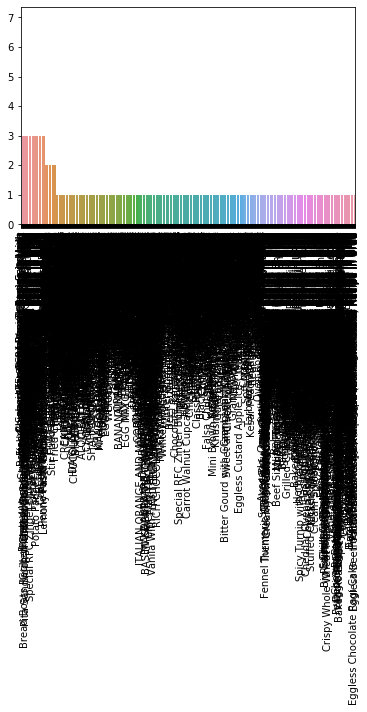

In [19]:
x_cu = [cu for cu, frq in counts_cuis.most_common()]
y_frq = [frq for cu, frq in counts_cuis.most_common()]
fbar = sns.barplot(x = x_cu, y = y_frq)
# xlabels
for item in fbar.get_xticklabels():
    item.set_rotation(90)

In [23]:
num_ingredients = dict(zip(counts_cuis.keys(), [list() for x in counts_cuis.keys()]))
for recipt in trainrecipts:
    # append the number in the list
    num_ingredients[recipt['recipie'].strip()].append(len(recipt['ingredients']))

len(num_ingredients)

1439

In [24]:
for cu, frq in num_ingredients.items():

    print('{}    \t\t{:.2f}'.format(cu, np.mean(frq)))

KALAKAND SWEET / MITHAI    		4.00
ARIZONA CHICKEN STEAK    		16.00
CHICKEN CREAMY PIE    		12.00
2 INGREDIENTS CHOCOLATE MOUSSE    		2.00
KARACHI FAMOUS STUDENT BIRYANI    		23.00
FRUIT PUNCH DELIGHT    		9.00
MEETHI TIKKIYAN OR PORIAN    		8.00
BURNS ROAD’S WAHEED KE KEBAB    		14.00
GOND KA HALWA    		8.00
EGG FRIED RICE- RESTAURANT STYLE    		17.00
DRAGON CHICKEN- RESTAURANT STYLE    		20.00
HOME MADE KHOYA    		3.00
DHABA STYLE MASH KI DAAL    		16.00
BOHRA MALPUA/ MALFUA    		6.00
LAHORI MUTTON/ CHICKEN PALAK    		16.00
CHICKEN BBQ BURGER    		18.00
BBQ RICE    		18.00
FRY MAGHAZ / BRAIN MASALA    		15.00
CAKE RUSK    		8.00
CHOCOLATE MALTESERS CAKE    		15.00
KABULI / AFGHANI PULAO    		12.00
HYDRABADI MUTTON KEBABS    		15.00
KATA KAT/ TAKKA TAK    		28.00
CHICKEN KABSA RICE    		16.00
ALMOND CAKE    		11.00
CHOCOLATE COLD CAKE    		7.00
SEEKH KEBAB KARHAI    		18.00
CHOCOLATE GOLGAPPA    		7.00
NANDO’S CHICKEN PUFF PIE    		14.00
CHICKEN CUTLETS    		14.00
CHICKEN SAMOSA    		1

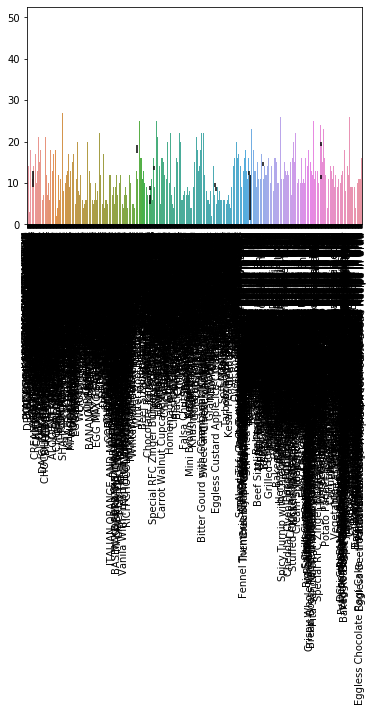

In [25]:
x_cu = [cu for cu, frq in num_ingredients.items()]
y_frq = [np.mean(frq) for cu, frq in num_ingredients.items()]
err = [np.std(frq) for cu, frq in num_ingredients.items()]
fbar = sns.barplot(x = x_cu, y = y_frq, yerr=err)
# xlabels
for item in fbar.get_xticklabels():
    item.set_rotation(90)

In [26]:
# Dispersion of the frequencies Ingredients
print(np.mean(list(counts_ingr.values())))
print(np.std(list(counts_ingr.values())))

1.985735366453517
5.516571035434527


In [27]:
print(np.median(list(counts_ingr.values())))
print(np.percentile(list(counts_ingr.values()), [25., 50., 75., 99.]))

1.0
[ 1.    1.    2.   15.36]


In [28]:
counts_ingr.most_common(15)

[('Salt to taste', 418),
 ('to taste Salt', 117),
 ('1 Onion', 92),
 ('Oil for frying', 86),
 ('', 85),
 ('Egg 1', 74),
 ('1 tsp Salt', 72),
 ('1 Egg', 70),
 ('Salt ½ tsp', 57),
 ('Oil', 52),
 ('Oil 2 tbsp', 50),
 ('Salt 1 tsp', 48),
 ('Ginger garlic paste 1 tbsp', 47),
 ('Eggs 2', 47),
 ('Black pepper 1 tsp', 45)]

In [29]:
# Tail 50
counts_ingr.most_common()[-50:]

[('100 grams  Butter (unsalted)', 1),
 ('20  Raisins , finely chopped', 1),
 ('1 1/2 cups  All Purpose Flour (Maida)', 1),
 ('1/2 cup  Mango Pulp (Puree)', 1),
 ('1/2 cup  Caster Sugar', 1),
 ('1/3 cup  Cooking oil', 1),
 ('2 tablespoon  Flaxmeal Egg Replacer', 1),
 ('1  pinch Salt', 1),
 ('2 teaspoon  Baking powder', 1),
 ('1/2 teaspoon  Saffron strands', 1),
 ('2 tablespoon  Sugar', 1),
 ('1/2 cup  Rabdi', 1),
 ('3  Whole Eggs , at room temperature', 1),
 ('125 grams  Cream cheese', 1),
 ('1/4 cup  All Purpose Flour (Maida)', 1),
 ('1-1/2 tablespoons  Corn flour', 1),
 ('1/4 cup  Sugar', 1),
 ('1 cup  Sooji (Semolina/ Rava)', 1),
 ('3/4 cup  Sugar', 1),
 ('150 ml  Milk , warm', 1),
 ('2 tablespoons  Ghee , (adjust)', 1),
 ('1/4 teaspoon  Cardamom Powder (Elaichi)', 1),
 ('Pistachios , a handful', 1),
 ('1/4 cup  Raisins , soaked in milk for 15 minutes', 1),
 ('1/8 teaspoon  Saffron strands , soaked in milk for 15 minutes', 1),
 ('1 cup  Almond Meal (Badam Powder)', 1),
 ('3/4 cup  Ic

In [30]:
symbols = list()

for recipt in trainrecipts:

    # I want ingredient remove 
    for ingredient in recipt['ingredients']:
        if re.match("\(|@|\$\?", ingredient.lower()):
            symbols.append(ingredient)
len(symbols)
counts_symbols = collections.Counter(symbols)
counts_symbols.most_common(20)

[('(chopped) Handful green coriander ', 1), ('(one pinch) Salt ', 1)]

In [40]:
sentences = list()
# one hot ingredients


for recipt in trainrecipts:
    clean_recipt = list()
    # I want ingredient remove 
    for ingredient in recipt['ingredients']:
        # remove this description from the ingredients
        # minimal preprocessing
        ingredient =  re.sub(r'\(.*oz.\)|crushed|crumbles|ground|minced|tsp|tbsp|as|required|for|powder|chopped|sliced|pinch|cup|/|ml|[0-9]',
                             '', 
                             ingredient)
        clean_recipt.append(ingredient.strip())
    sentences.append(clean_recipt)
        
len(sentences)

1721

In [41]:
sentences

[['Milk   s', 'Sugar    or to tte', 'Cream', 'Nuts'],
 ['Chicken fillets  flattened',
  'Salt to tatse',
  'White pepper',
  'Black pepper',
  'Garlic pte',
  'Lemon juice',
  'Worcestershire sauce',
  'Oyster sauce',
  'Chili sauce',
  'Plain flour   { coating}',
  'Butter',
  'Parsely  needed',
  'Garlic',
  'Oil  frying',
  'White Sauce  needed',
  'Saute Vegetabels  needed'],
 ['Chicken boiled and shredded',
  'Onion   medium',
  'Butter',
  'Black pepper',
  'Chicken',
  'Salt to tte',
  'Red chili flakes   or to tte',
  'Flour',
  'Milk',
  'Egg  beaten',
  'Sesame seeds  needed',
  'Puff ptry or pizza dough  needed'],
 ['Cooking Chocolate  Milk chocolate  g', 'Whipping cream  s'],
 ['Rice Bmati  kg',
  'Chicken   kg',
  'Red chili',
  'Black pepper',
  'White pepper',
  'Turmeric',
  'Chopped green chilies',
  'Whole Spices Mix',
  'Dhania   -',
  'Jaifal  Javtri',
  'Ajino moto (optional)',
  'All spice',
  'Cumin',
  'Ginger garlic pte  -',
  'Zarda  orange food colour',
  'Ke

In [42]:
num_features = 300    # Word vector dimensionality                      
min_word_count = 3    # 50% of the corpus                    
num_workers = 4       # Number of CPUs
context = 10          # Context window size; 
                      # let's use avg recipte size                                                                                  
downsampling = 1e-3   # threshold for configuring which 
                    # higher-frequency words are randomly downsampled

# Initialize and train the model 
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

In [43]:
model.most_similar(u'Worcestershire sauce')

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Coriander', 0.99828040599823),
 ('Oil', 0.9982771277427673),
 ('Cumin', 0.9982727766036987),
 ('Ketchup', 0.9982701539993286),
 ('Water', 0.9982672929763794),
 ('tepoon  Black pepper', 0.9982616305351257),
 ('Egg', 0.9982555508613586),
 ('Sugar', 0.9982551336288452),
 ('Salt to tte', 0.9982545375823975),
 ('cloves Garlic', 0.9982478618621826)]

In [44]:
corpus = sorted(model.wv.vocab.keys()) #not sure the exact api
emb_tuple = tuple([model[v] for v in corpus])
X = np.vstack(emb_tuple)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [45]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

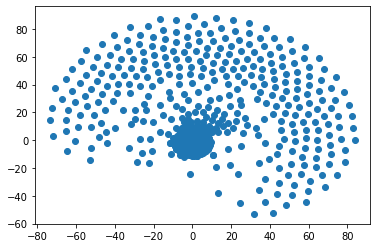

In [46]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

In [48]:
#
# I will label a ingredient by frequency 
track_ingredients = dict(zip(counts_cuis.keys(), [list() for x in counts_cuis.keys()]))
for recipt in trainrecipts:
    # append the number in the list
    clean_recipt = list()
    # I want ingredient remove 
    for ingredient in recipt['ingredients']:
        # remove this description from the ingredients
        # (10 oz.) 
        ingredient =  re.sub(r'\(.*oz.\)|crushed|crumbles|ground|minced|tsp|tbsp|as|required|for|powder|chopped|sliced|pinch|cup|/|ml|[0-9]', '', ingredient)
        clean_recipt.append(ingredient.strip())
        
    track_ingredients[recipt['recipie'].strip()].extend(clean_recipt)

for label, tracking in track_ingredients.items():
    track_ingredients[label] = collections.Counter(tracking)

In [49]:
def return_most_popular(v):
    cuisine = None
    record = 0
    for label, tracking in track_ingredients.items():
        norm_freq = float(tracking[v]) / float(counts_cuis[label])
        if norm_freq > record:
            cuisine = label
            record = norm_freq
    return cuisine

In [50]:
color_vector = list()
for v in corpus:
    cuisine = return_most_popular(v)

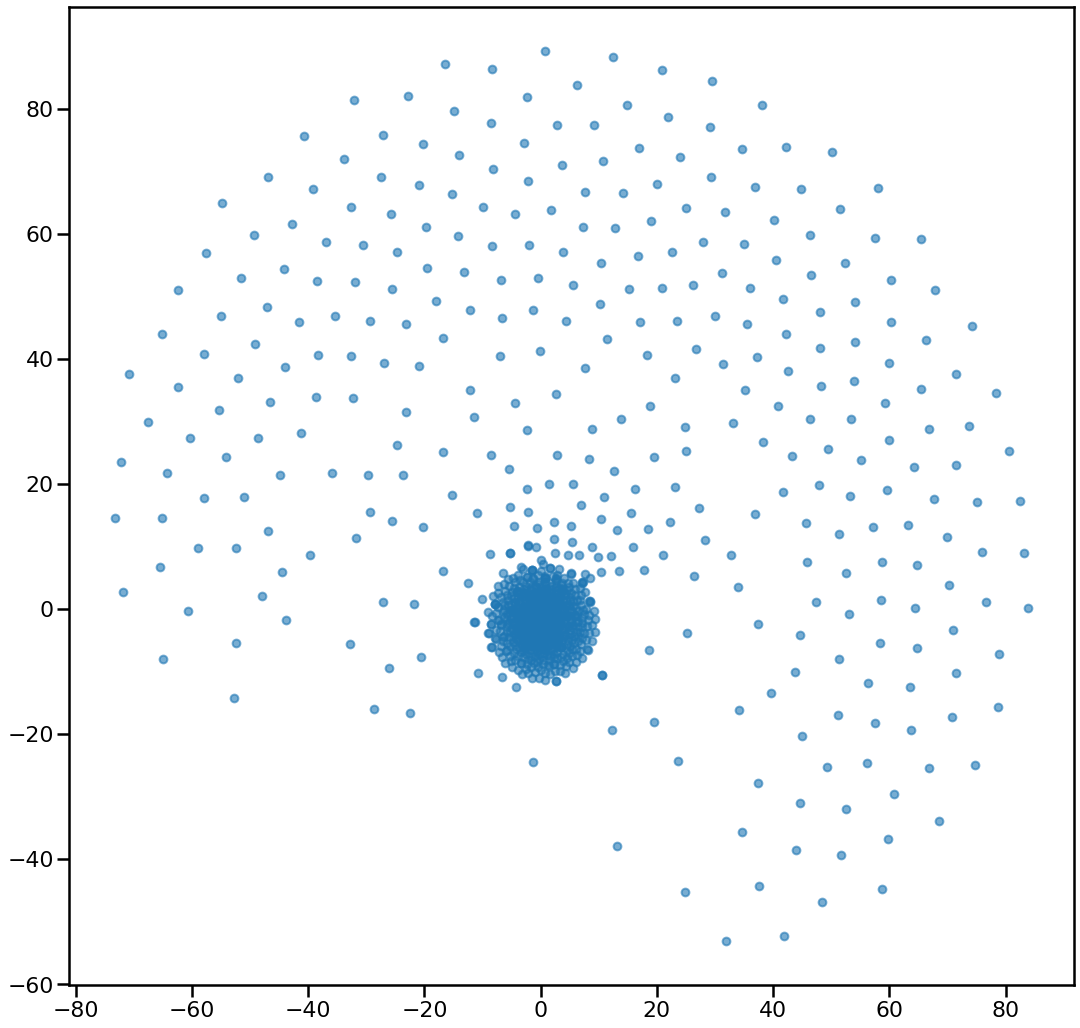

In [53]:
sns.set_context("poster")
fig, ax = plt.subplots(figsize=(18,18))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=.6, s=60)

In [55]:
return_most_popular('Cabbage')

'EGG FRIED RICE- RESTAURANT STYLE'